# Quiz: Social Network Analysis
## Link Analysis using Facebook Dataset

**Objective:** Construct a graph and perform link analysis using network measures to understand influence, connectivity, and community structure.

**Dataset:** SNAP Facebook Combined Network (Option C)

### Setup and Imports

**Required Libraries:** NetworkX (graph analysis), Matplotlib (visualization), Pandas (data handling), NumPy (numerical operations)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
import gzip
import shutil
import os
import numpy as np

%matplotlib inline

### 1. Obtain Your Network Data (Option C - Facebook Dataset)

In [3]:
def download_and_extract_facebook_data():
    """
    Download SNAP Facebook dataset (ego-Facebook network)
    Dataset: https://snap.stanford.edu/data/ego-Facebook.html
    """
    url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
    filename = "facebook_combined.txt.gz"
    extracted_filename = "facebook_combined.txt"

    if not os.path.exists(extracted_filename):
        print(f"Downloading {filename}...")
        urllib.request.urlretrieve(url, filename)

        print(f"Extracting {filename}...")
        with gzip.open(filename, 'rb') as f_in:
            with open(extracted_filename, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print("Done.")
    else:
        print("Dataset already exists.")
    return extracted_filename

data_file = download_and_extract_facebook_data()

Extracting facebook_combined.txt.gz...
Done.


**Data Source:** Stanford Large Network Dataset Collection (SNAP)  
**Contains:** Real anonymized Facebook friendships from survey participants  
**Format:** Edge list (node1 node2) representing mutual friendships

## 2. Construct the Graph
Constructing the graph where:
- Each person = Node
- A connection/follow = Edge

In [4]:
print("Loading Facebook Graph...")
# Facebook network is undirected (friendships are mutual)
G = nx.read_edgelist(data_file, create_using=nx.Graph(), nodetype=int)
print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(G)

Loading Facebook Graph...
Graph loaded: 4039 nodes, 88234 edges
Graph with 4039 nodes and 88234 edges


In [5]:
# Display network statistics
print("\n" + "=" * 60)
print("NETWORK STATISTICS")
print("=" * 60)
print(f"Number of Nodes (People): {G.number_of_nodes():,}")
print(f"Number of Edges (Friendships): {G.number_of_edges():,}")
print(f"Network Density: {nx.density(G):.4f}")
print(f"Is Connected: {nx.is_connected(G)}")
if nx.is_connected(G):
    print(f"Network Diameter: {nx.diameter(G)}")
    print(f"Average Shortest Path Length: {nx.average_shortest_path_length(G):.2f}")
else:
    num_components = nx.number_connected_components(G)
    largest_cc = max(nx.connected_components(G), key=len)
    print(f"Number of Components: {num_components}")
    print(f"Largest Component Size: {len(largest_cc)} nodes ({len(largest_cc)/G.number_of_nodes()*100:.1f}%)")
print("=" * 60 + "\n")


NETWORK STATISTICS
Number of Nodes (People): 4,039
Number of Edges (Friendships): 88,234
Network Density: 0.0108
Is Connected: True
Network Diameter: 8
Average Shortest Path Length: 3.69



**Key Metrics:**
- **Density:** Ratio of actual to possible connections (low = sparse network)
- **Diameter:** Longest shortest path between any two nodes (network breadth)
- **Avg Path Length:** Average steps to reach any node (small-world effect if low)

## 3. Perform Link Analysis

**Centrality measures identify important nodes** in different ways:
- **Degree:** Direct connections (popularity)
- **Closeness:** Proximity to all nodes (reach)
- **Betweenness:** Bridge between groups (control)
- **Eigenvector:** Connected to important nodes (influence)
- **Clustering:** Friends interconnectedness (cohesion)

### 3.i. Degree Centrality

**Measures:** Number of direct connections (normalized by max possible)  
**Interpretation:** High degree = popular/well-connected person

In [6]:
print("Calculating Degree Centrality...")
degree_cent = nx.degree_centrality(G)
print("Degree Centrality Calculated.")

# Show top 5 nodes by degree centrality
top_5_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 Nodes by Degree Centrality:")
for i, (node, score) in enumerate(top_5_degree, 1):
    print(f"  {i}. Node {node}: {score:.4f}")

Calculating Degree Centrality...
Degree Centrality Calculated.

Top 5 Nodes by Degree Centrality:
  1. Node 107: 0.2588
  2. Node 1684: 0.1961
  3. Node 1912: 0.1870
  4. Node 3437: 0.1355
  5. Node 0: 0.0859


### 3.ii. Closeness Centrality

**Measures:** Average distance to all other nodes (inverted)  
**Interpretation:** High closeness = can quickly reach anyone in network

In [7]:
print("Calculating Closeness Centrality...")
# For smaller Facebook network, we can compute on full graph
# If it's too large, we'll use a subgraph
if G.number_of_nodes() < 5000:
    closeness_cent = nx.closeness_centrality(G)
    print("Closeness Centrality Calculated (full graph).")
else:
    print("Large network, using top 100 nodes for closeness...")
    top_degree_nodes = sorted(degree_cent, key=degree_cent.get, reverse=True)[:100]
    subgraph_top = G.subgraph(top_degree_nodes)
    closeness_cent = nx.closeness_centrality(subgraph_top)
    print("Closeness Centrality Calculated (for top nodes).")

Calculating Closeness Centrality...
Closeness Centrality Calculated (full graph).


### 3.iii. Betweenness Centrality

**Measures:** How often a node lies on shortest paths between others  
**Interpretation:** High betweenness = gatekeeper/bridge connecting communities

In [8]:
print("Calculating Betweenness Centrality...")
# Use k for approximation if network is large
between_cent = nx.betweenness_centrality(G, k=min(1000, G.number_of_nodes()))
print("Betweenness Centrality Calculated.")

Calculating Betweenness Centrality...
Betweenness Centrality Calculated.


### 3.iv. Eigenvector Centrality

**Measures:** Connected to other highly connected nodes  
**Interpretation:** High eigenvector = influential through powerful connections

In [9]:
print("Calculating Eigenvector Centrality...")
try:
    eigen_cent = nx.eigenvector_centrality(G, max_iter=200)
except nx.PowerIterationFailedConvergence:
    print("Eigenvector convergence failed, increasing iterations...")
    try:
        eigen_cent = nx.eigenvector_centrality(G, max_iter=500)
    except:
        print("Using eigenvector centrality from numpy method...")
        eigen_cent = nx.eigenvector_centrality_numpy(G)
print("Eigenvector Centrality Calculated.")

Calculating Eigenvector Centrality...
Eigenvector Centrality Calculated.


### 3.v. Local Clustering Coefficient

**Measures:** Proportion of neighbors that are also connected  
**Interpretation:** High clustering = tight-knit group, low = diverse separate connections

In [10]:
print("Calculating Clustering Coefficient...")
clustering_coeff = nx.clustering(G)
print(f"Clustering coefficients calculated for {len(clustering_coeff)} nodes.")

Calculating Clustering Coefficient...
Clustering coefficients calculated for 4039 nodes.


In [11]:
# Create a comprehensive summary of top nodes
top_10_nodes = sorted(degree_cent, key=degree_cent.get, reverse=True)[:10]

# Create a summary dataframe
summary_data = []
for node in top_10_nodes:
    summary_data.append({
        'Node': node,
        'Degree': f"{degree_cent[node]:.4f}",
        'Closeness': f"{closeness_cent.get(node, 0):.4f}",
        'Betweenness': f"{between_cent[node]:.4f}",
        'Eigenvector': f"{eigen_cent[node]:.4f}",
        'Clustering': f"{clustering_coeff[node]:.4f}"
    })

df_summary = pd.DataFrame(summary_data)
print("Top 10 Nodes - Centrality Measures Comparison:")
print("=" * 80)
print(df_summary.to_string(index=False))
print("=" * 80)

Top 10 Nodes - Centrality Measures Comparison:
 Node Degree Closeness Betweenness Eigenvector Clustering
  107 0.2588    0.4597      0.4807      0.0003     0.0490
 1684 0.1961    0.3936      0.3330      0.0000     0.0448
 1912 0.1870    0.3509      0.2268      0.0954     0.1055
 3437 0.1355    0.3144      0.2359      0.0000     0.0322
    0 0.0859    0.3533      0.1540      0.0000     0.0420
 2543 0.0728    0.2913      0.0078      0.0729     0.3599
 2347 0.0721    0.2834      0.0031      0.0803     0.3996
 1888 0.0629    0.3213      0.0001      0.0001     0.3997
 1800 0.0607    0.3216      0.0002      0.0001     0.4020
 1663 0.0582    0.3392      0.0013      0.0001     0.4165


### Summary: Top 10 Nodes Across All Centrality Measures

**Comparative Analysis:** Shows which nodes rank high across multiple centrality measures  
**Insight:** A truly important node will score high in several metrics

## 4. Answer the following questions

### 4.i. Who is the most influential person in your network? (based on eigenvector)

In [12]:
most_influential = max(eigen_cent, key=eigen_cent.get)
print(f"✓ Most Influential Person (Node ID): {most_influential}")
print(f"  Eigenvector Centrality Score: {eigen_cent[most_influential]:.4f}")
print(f"\nExplanation: This node has the highest eigenvector centrality, meaning it is")
print(f"connected to other highly influential nodes in the network.")

✓ Most Influential Person (Node ID): 1912
  Eigenvector Centrality Score: 0.0954

Explanation: This node has the highest eigenvector centrality, meaning it is
connected to other highly influential nodes in the network.


### 4.ii. Who acts as a bridge between communities? (betweenness)

In [13]:
bridge_node = max(between_cent, key=between_cent.get)
print(f"✓ Bridge Node (Highest Betweenness): {bridge_node}")
print(f"  Betweenness Centrality Score: {between_cent[bridge_node]:.4f}")
print(f"\nExplanation: This node lies on the most shortest paths between other nodes,")
print(f"acting as a critical bridge connecting different communities in the network.")

✓ Bridge Node (Highest Betweenness): 107
  Betweenness Centrality Score: 0.4807

Explanation: This node lies on the most shortest paths between other nodes,
acting as a critical bridge connecting different communities in the network.


### 4.iii. Are your friends tightly connected or loosely connected? (clustering coefficient)

In [14]:
avg_clustering = nx.average_clustering(G)
print(f"✓ Average Clustering Coefficient: {avg_clustering:.4f}")

if avg_clustering > 0.5:
    interpretation = "TIGHTLY connected"
    explanation = "High clustering indicates that friends of friends tend to be friends,\nforming dense, close-knit groups."
elif avg_clustering > 0.3:
    interpretation = "MODERATELY connected"
    explanation = "Moderate clustering suggests a mix of tight groups and looser connections."
else:
    interpretation = "LOOSELY connected"
    explanation = "Low clustering indicates sparse connections between neighbors,\nwith less community cohesion."

print(f"  Interpretation: Friends are {interpretation}")
print(f"\nExplanation: {explanation}")

✓ Average Clustering Coefficient: 0.6055
  Interpretation: Friends are TIGHTLY connected

Explanation: High clustering indicates that friends of friends tend to be friends,
forming dense, close-knit groups.


### 4.iv. Is your network centralized around few people or distributed?

In [15]:
degrees = [d for n, d in G.degree()]
degree_mean = np.mean(degrees)
degree_std = np.std(degrees)
degree_max = max(degrees)

print(f"✓ Network Degree Statistics:")
print(f"  Mean Degree: {degree_mean:.2f}")
print(f"  Std Deviation: {degree_std:.2f}")
print(f"  Max Degree: {degree_max}")
print(f"  Coefficient of Variation: {degree_std/degree_mean:.2f}")

# Determine centralization
cv = degree_std / degree_mean
if cv > 1.5:
    structure = "HIGHLY CENTRALIZED around a few hubs"
    explanation = "High variation in degrees indicates a few highly connected nodes (hubs)\ndominating the network, following a power-law distribution."
elif cv > 0.8:
    structure = "MODERATELY CENTRALIZED"
    explanation = "Some nodes have significantly more connections than others,\nbut the network isn't dominated by just a few hubs."
else:
    structure = "DISTRIBUTED evenly"
    explanation = "Degrees are relatively uniform across nodes,\nindicating a more democratic network structure."

print(f"\n  Network Structure: {structure}")
print(f"\nExplanation: {explanation}")

✓ Network Degree Statistics:
  Mean Degree: 43.69
  Std Deviation: 52.41
  Max Degree: 1045
  Coefficient of Variation: 1.20

  Network Structure: MODERATELY CENTRALIZED

Explanation: Some nodes have significantly more connections than others,
but the network isn't dominated by just a few hubs.


## 5. Draw the network using spring layout and highlight:

**Visualization Strategy:**
- Use spring layout (force-directed) for natural clustering
- Color nodes by community (modularity-based detection)
- Highlight top 5 influential nodes in red with labels
- Subset to top 200 nodes for clarity

### 5.i. Top 5 influential nodes & 5.ii Communities in different colors

Visualization subgraph: 200 nodes, 8976 edges
Number of communities detected: 5


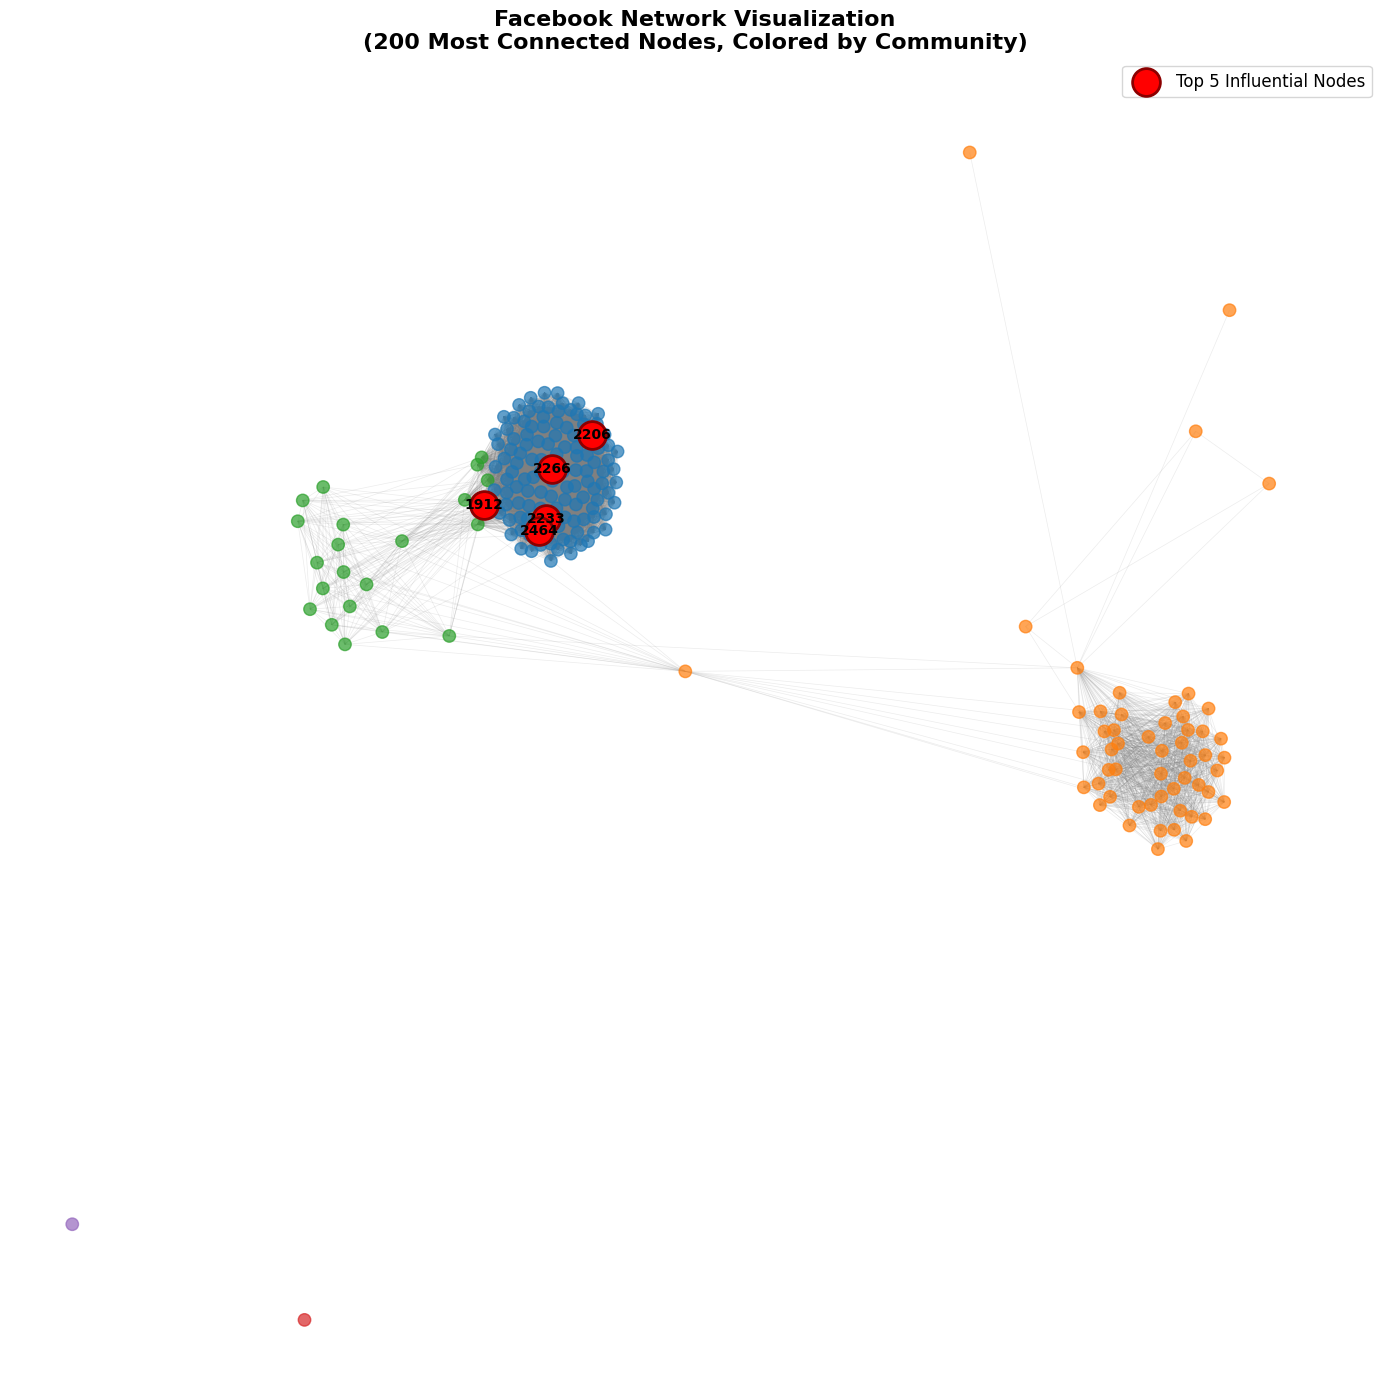

In [16]:
# Create a subgraph for visualization (top nodes by degree)
viz_size = min(200, G.number_of_nodes())
top_nodes = sorted(degree_cent, key=degree_cent.get, reverse=True)[:viz_size]
subG = G.subgraph(top_nodes).copy()

print(f"Visualization subgraph: {subG.number_of_nodes()} nodes, {subG.number_of_edges()} edges")

# Detect communities using Louvain or greedy modularity
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(subG))

print(f"Number of communities detected: {len(communities)}")

# Assign colors to nodes based on their community
node_color_map = {}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']
for i, comm in enumerate(communities):
    c = colors[i % len(colors)]
    for node in comm:
        node_color_map[node] = c

color_list = [node_color_map.get(node, '#333333') for node in subG.nodes()]

# Get top 5 influential nodes (by eigenvector centrality)
top_5_influential = sorted(eigen_cent, key=eigen_cent.get, reverse=True)[:5]

# Create the visualization
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(subG, k=0.3, iterations=50, seed=42)

# Draw network
nx.draw_networkx_nodes(subG, pos, node_size=80, node_color=color_list, alpha=0.7)
nx.draw_networkx_edges(subG, pos, alpha=0.15, edge_color='gray', width=0.5)

# Highlight top 5 influential nodes
top_5_in_subgraph = [n for n in top_5_influential if n in subG]
nx.draw_networkx_nodes(subG, pos, nodelist=top_5_in_subgraph, 
                       node_size=400, node_color='red', 
                       edgecolors='darkred', linewidths=2,
                       label='Top 5 Influential Nodes')

# Add labels for top influential nodes
labels = {node: str(node) for node in top_5_in_subgraph}
nx.draw_networkx_labels(subG, pos, labels, font_size=10, font_weight='bold')

plt.title(f"Facebook Network Visualization\n({viz_size} Most Connected Nodes, Colored by Community)", 
          fontsize=16, fontweight='bold')
plt.axis('off')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## 6. Bonus mark Question: If this top influential node is removed, how does the network structure change?

**Test network resilience** by removing the most influential node  
**Analyzes:** Changes in clustering, connectivity, components, and average degree  
**Goal:** Understand if the network is robust or fragile to key node removal

In [17]:
print("=" * 60)
print("BONUS: Analyzing Network Change After Removing Top Node")
print("=" * 60)

G_removed = G.copy()
top_node = most_influential
G_removed.remove_node(top_node)

print(f"\nRemoved Top Influential Node: {top_node}")
print(f"Original nodes: {G.number_of_nodes()}, New nodes: {G_removed.number_of_nodes()}")

# 1. Clustering Coefficient Change
new_avg_clustering = nx.average_clustering(G_removed)
print(f"\n--- Clustering Analysis ---")
print(f"Original Average Clustering: {avg_clustering:.4f}")
print(f"New Average Clustering: {new_avg_clustering:.4f}")
print(f"Change: {new_avg_clustering - avg_clustering:.4f}")

# 2. Connectivity Analysis
if nx.is_connected(G):
    print(f"\n--- Connectivity Analysis ---")
    print(f"Original: Network is connected")
    if nx.is_connected(G_removed):
        print(f"After removal: Network is still connected")
    else:
        num_components = nx.number_connected_components(G_removed)
        largest_cc = max(nx.connected_components(G_removed), key=len)
        print(f"After removal: Network fragmented into {num_components} components")
        print(f"Largest component size: {len(largest_cc)} nodes ({len(largest_cc)/G_removed.number_of_nodes()*100:.1f}%)")
else:
    print(f"\n--- Component Analysis ---")
    orig_components = nx.number_connected_components(G)
    new_components = nx.number_connected_components(G_removed)
    print(f"Original components: {orig_components}")
    print(f"New components: {new_components}")
    print(f"Change: +{new_components - orig_components} components")

# 3. Average degree change
orig_avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
new_avg_degree = sum(dict(G_removed.degree()).values()) / G_removed.number_of_nodes()
print(f"\n--- Degree Analysis ---")
print(f"Original average degree: {orig_avg_degree:.2f}")
print(f"New average degree: {new_avg_degree:.2f}")
print(f"Change: {new_avg_degree - orig_avg_degree:.2f}")

print(f"\n{'=' * 60}")
print("Conclusion: The network structure " + 
      ("significantly changed" if abs(new_avg_clustering - avg_clustering) > 0.01 or 
       (nx.is_connected(G) and not nx.is_connected(G_removed)) 
       else "remained relatively stable") + 
      " after removing the most influential node.")
print("=" * 60)

BONUS: Analyzing Network Change After Removing Top Node

Removed Top Influential Node: 1912
Original nodes: 4039, New nodes: 4038

--- Clustering Analysis ---
Original Average Clustering: 0.6055
New Average Clustering: 0.5997
Change: -0.0059

--- Connectivity Analysis ---
Original: Network is connected
After removal: Network fragmented into 8 components
Largest component size: 4031 nodes (99.8%)

--- Degree Analysis ---
Original average degree: 43.69
New average degree: 43.33
Change: -0.36

Conclusion: The network structure significantly changed after removing the most influential node.
